In [1]:
import pandas as pd
import numpy as np

In [2]:
# Importing the dataset
dataset = pd.read_csv(r'C:\Users\User\Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

In [3]:
dataset = dataset.iloc[:,[2,3,4]]

In [4]:
dataset.head()

,Age,Income,Purchased
0,20,19500,0
1,36,20500,0
2,27,43500,0
3,28,57500,0
4,20,76500,0


In [5]:
dataset.shape

(400, 3)

In [6]:
dataset["Purchased"].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

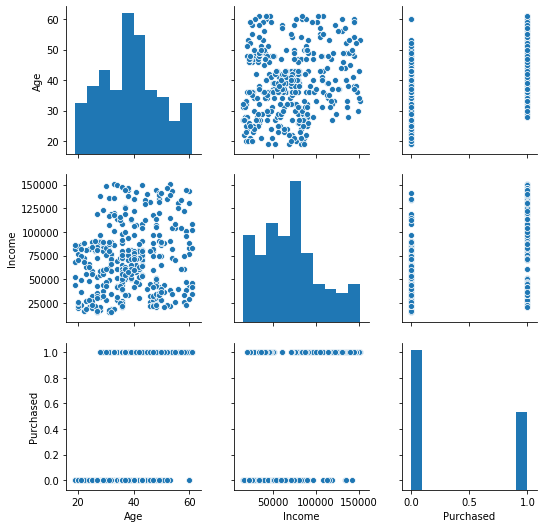

In [7]:
%matplotlib inline
import seaborn as sns
sns.pairplot(dataset)

In [8]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)



In [9]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [11]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(X_train, y_train)
target_pred = clf.predict(X_test)

In [13]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, target_pred))
print('\n')
print(classification_report(y_test, target_pred))

[[65  3]
 [ 7 25]]


              precision    recall  f1-score   support

           0       0.90      0.96      0.93        68
           1       0.89      0.78      0.83        32

    accuracy                           0.90       100
   macro avg       0.90      0.87      0.88       100
weighted avg       0.90      0.90      0.90       100



In [14]:
a = float(input("age"))
b = float(input("income"))
c = np.zeros((1,2))
c[0,0] = a
c[0,1] = b
print(c.shape)
c = np.array(c)
c = sc.transform(c)
Item  = clf.predict(c)
print([Item])

age20
income15000
(1, 2)
[array([0], dtype=int64)]


In [15]:
X_train.shape

(300, 2)

In [16]:
import pickle
pickle_file = 'Product.pkl'
with open(pickle_file,'wb')  as file:
    pickle.dump(clf,file)

In [17]:
import pickle
pickle_file = 'Product_t.pkl'
with open(pickle_file,'wb')  as file:
    pickle.dump(sc,file)